In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [81]:
x = pd.read_csv('train.csv', encoding='euc-kr')
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
0,1,0,0,1,9.84,14.395,81,8.831761,2011,1,1,0,16
1,1,0,0,1,9.02,13.635,80,8.527546,2011,1,1,1,40
2,1,0,0,1,9.02,13.635,80,8.456593,2011,1,1,2,32
3,1,0,0,1,9.84,14.395,75,8.614047,2011,1,1,3,13
4,1,0,0,1,9.84,14.395,75,8.437458,2011,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.002700,2012,12,19,19,336
10882,4,0,1,1,14.76,17.425,57,15.001300,2012,12,19,20,241
10883,4,0,1,1,13.94,15.910,61,15.001300,2012,12,19,21,168
10884,4,0,1,1,13.94,17.425,61,6.003200,2012,12,19,22,129


In [82]:
x['season'] = x['season'].astype('category')

In [83]:
x['season']

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [84]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  int64   
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   year        10886 non-null  int64   
 9   month       10886 non-null  int64   
 10  day         10886 non-null  int64   
 11  hour        10886 non-null  int64   
 12  count       10886 non-null  int64   
dtypes: category(1), float64(3), int64(9)
memory usage: 1.0 MB


In [85]:
season = pd.get_dummies(x['season'], prefix='season')

In [86]:
x['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [87]:
year = pd.get_dummies(x['year'], prefix='year')

In [88]:
x = pd.concat([x, season], axis=1)
x = pd.concat([x, year], axis=1)
x = x.drop('season', axis=1)
x = x.drop('year', axis=1)
x

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,count,season_1,season_2,season_3,season_4,year_2011,year_2012
0,0,0,1,9.84,14.395,81,8.831761,1,1,0,16,1,0,0,0,1,0
1,0,0,1,9.02,13.635,80,8.527546,1,1,1,40,1,0,0,0,1,0
2,0,0,1,9.02,13.635,80,8.456593,1,1,2,32,1,0,0,0,1,0
3,0,0,1,9.84,14.395,75,8.614047,1,1,3,13,1,0,0,0,1,0
4,0,0,1,9.84,14.395,75,8.437458,1,1,4,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.002700,12,19,19,336,0,0,0,1,0,1
10882,0,1,1,14.76,17.425,57,15.001300,12,19,20,241,0,0,0,1,0,1
10883,0,1,1,13.94,15.910,61,15.001300,12,19,21,168,0,0,0,1,0,1
10884,0,1,1,13.94,17.425,61,6.003200,12,19,22,129,0,0,0,1,0,1


In [89]:
x['windspeed'] = np.log(x['windspeed'] + 1)
x

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,count,season_1,season_2,season_3,season_4,year_2011,year_2012
0,0,0,1,9.84,14.395,81,2.285618,1,1,0,16,1,0,0,0,1,0
1,0,0,1,9.02,13.635,80,2.254187,1,1,1,40,1,0,0,0,1,0
2,0,0,1,9.02,13.635,80,2.246712,1,1,2,32,1,0,0,0,1,0
3,0,0,1,9.84,14.395,75,2.263225,1,1,3,13,1,0,0,0,1,0
4,0,0,1,9.84,14.395,75,2.244687,1,1,4,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,3.295937,12,19,19,336,0,0,0,1,0,1
10882,0,1,1,14.76,17.425,57,2.772670,12,19,20,241,0,0,0,1,0,1
10883,0,1,1,13.94,15.910,61,2.772670,12,19,21,168,0,0,0,1,0,1
10884,0,1,1,13.94,17.425,61,1.946367,12,19,22,129,0,0,0,1,0,1


In [90]:
x.corr()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,count,season_1,season_2,season_3,season_4,year_2011,year_2012
holiday,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.025596,0.001731,-0.015877,-0.000354,-0.005393,-0.007336,-0.038250,0.022790,0.022751,-0.012021,0.012021
workingday,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.020499,-0.003394,0.009829,0.002780,0.011594,-0.000379,0.014620,-0.007194,-0.007048,0.002482,-0.002482
weather,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,-0.006262,0.012144,-0.007890,-0.022740,-0.128655,0.005414,0.004157,-0.047316,0.037771,0.012548,-0.012548
temp,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,0.021966,0.257589,0.015551,0.145430,0.394454,-0.565655,0.192661,0.635975,-0.266220,-0.061226,0.061226
atemp,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.013701,0.264173,0.011866,0.140343,0.389784,-0.569082,0.204421,0.607090,-0.245690,-0.058540,0.058540
humidity,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.327816,0.204537,-0.011335,-0.278011,-0.317371,-0.166208,-0.031095,0.067308,0.129018,0.078606,-0.078606
windspeed,0.025596,0.020499,-0.006262,0.021966,-0.013701,-0.327816,1.000000,-0.117610,0.021314,0.148350,0.123220,0.088229,0.050621,-0.085330,-0.053004,0.037489,-0.037489
month,0.001731,-0.003394,0.012144,0.257589,0.264173,0.204537,-0.117610,1.000000,0.001974,-0.006818,0.166862,-0.750291,-0.255581,0.248354,0.753087,0.004932,-0.004932
day,-0.015877,0.009829,-0.007890,0.015551,0.011866,-0.011335,0.021314,0.001974,1.000000,0.001132,0.019826,-0.002491,0.001019,0.000941,0.000516,-0.001800,0.001800
hour,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.148350,-0.006818,0.001132,1.000000,0.400601,0.008357,-0.002733,-0.002611,-0.002964,0.004234,-0.004234


In [91]:
X = x.drop('count', axis=1)
Y = x['count']
X

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,season_1,season_2,season_3,season_4,year_2011,year_2012
0,0,0,1,9.84,14.395,81,2.285618,1,1,0,1,0,0,0,1,0
1,0,0,1,9.02,13.635,80,2.254187,1,1,1,1,0,0,0,1,0
2,0,0,1,9.02,13.635,80,2.246712,1,1,2,1,0,0,0,1,0
3,0,0,1,9.84,14.395,75,2.263225,1,1,3,1,0,0,0,1,0
4,0,0,1,9.84,14.395,75,2.244687,1,1,4,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,3.295937,12,19,19,0,0,0,1,0,1
10882,0,1,1,14.76,17.425,57,2.772670,12,19,20,0,0,0,1,0,1
10883,0,1,1,13.94,15.910,61,2.772670,12,19,21,0,0,0,1,0,1
10884,0,1,1,13.94,17.425,61,1.946367,12,19,22,0,0,0,1,0,1


In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [93]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7620, 16), (3266, 16), (7620,), (3266,))

In [94]:
# from sklearn.linear_model import LogisticRegression 
# from sklearn.pipeline import Pipeline 
# from sklearn.model_selection import learning_curve
# from sklearn.preprocessing import StandardScaler

# pipe_lr = Pipeline([('scl',StandardScaler()),('clf',LogisticRegression(penalty='l2',random_state=0))])

# train_sizes, train_scores,test_scores = learning_curve(estimator=pipe_lr, X=x_train, y=y_train, train_sizes=np.linspace(1,0.1,10), cv=10, n_jobs=1)

# train_mean = np.mean(train_scores,axis=1)
# train_std = np.std(train_scores,axis=1)
# test_mean = np.mean(test_scores,axis=1)
# test_std = np.std(test_scores,axis=1)

# plt.plot(train_sizes,train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
# plt.plot(train_sizes,test_mean, color='green',linestyle='--', marker='s', markersize=5, label='validation accuracy')



Text(0.5, 0, 'humidity (after transformation)')

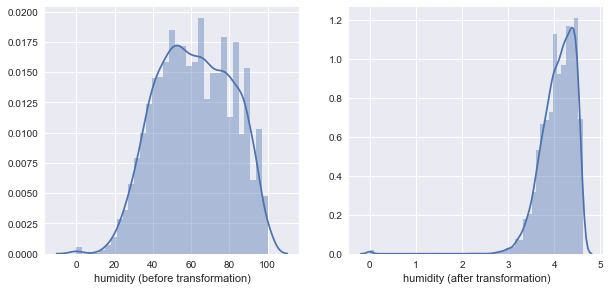

In [95]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(x_train['humidity'])
plt.xlabel("humidity (before transformation)")
plt.subplot(222)
sns.distplot(np.log(x_train['humidity'] + 1))
plt.xlabel("humidity (after transformation)")

Text(0.5, 0, 'temp)')

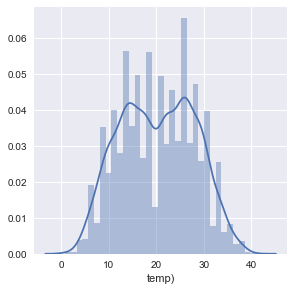

In [96]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(x_train['temp'])
plt.xlabel("temp)")

In [97]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
import time
#MSE의 변화를 확인하기 위하여 앙상블의 크기 범위에서 랜덤 포레스트 트레이닝
start_time = time.time()
nTreeList = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]
for iTrees in nTreeList:
    maxFeat = 4 #조정해볼 것
    rf = ensemble.RandomForestRegressor(n_estimators=iTrees,
                                        max_depth=3, max_features=maxFeat,
                                        oob_score=False, random_state=531)
    rf.fit(x_train, y_train)
    #데이터 세트에 대한 MSE 누적
    y_rf = rf.predict(x_test)

    RMSE = mean_squared_error(y_test, y_rf)**0.5
    print('n_estimators : ',iTrees, 'RMSE : ',RMSE)
end_time = time.time()

n_estimators :  50 RMSE :  133.9582949510308
n_estimators :  100 RMSE :  132.75816686237263
n_estimators :  150 RMSE :  132.38742837894242
n_estimators :  200 RMSE :  132.67140447964357
n_estimators :  250 RMSE :  132.5082125738337
n_estimators :  300 RMSE :  132.28519681293625
n_estimators :  350 RMSE :  132.2701444573396
n_estimators :  400 RMSE :  132.32247922208748
n_estimators :  450 RMSE :  132.44938731962552
n_estimators :  500 RMSE :  132.13490408707642
n_estimators :  600 RMSE :  131.9868459663596
n_estimators :  700 RMSE :  132.231522456038
n_estimators :  800 RMSE :  132.23960586701574
n_estimators :  900 RMSE :  132.25536755181432
n_estimators :  1000 RMSE :  132.16974905830654


In [99]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000, 7000,8708]
features = ['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'year_2011', 'year_2012']
target = 'count'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = ensemble.RandomForestRegressor(n_estimators=iTrees,
            max_depth=3, max_features=maxFeat,
            oob_score=False, random_state=531),
            shuffle=True,
            X = x[features],
            y = x[target],
            train_sizes = train_sizes,
            cv = 5,
            scoring = 'neg_mean_squared_error') #평균제곱오차(MSE)의 반대인 음숫값을 계산
                                                #사이킷런의 교차검증은 scoring 매개변수에 (낮을수록 좋은) 비용함수가 아닌
                                                #(클 수록 좋은) 효용 함수를 기대하기 때문


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[    -0.             -0.             -0.             -0.
      -0.        ]
 [-10265.77170522 -10162.93632748 -14608.04461948 -12936.86074232
  -11649.64484194]
 [-15122.91917371 -15403.09810219 -18800.00620135 -16194.1226601
  -14175.58825711]
 [-18329.8807755  -17279.58447906 -17494.80516794 -15196.95658243
  -13713.58757755]
 [-17811.45944141 -17606.35874792 -18355.15745426 -14888.87596939
  -13833.16322178]
 [-18119.96864336 -17938.03627959 -18040.33508555 -15118.87656705
  -13601.80290063]
 [-18386.04311823 -18100.35475069 -17962.08508611 -15236.00638492
  -13791.53107549]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -92401.45546373  -44409.52181902 -151885.27560864  -75690.1414791
   -48498.99402848]
 [ -12332.43097127  -12549.6598955   -12194.33919416  -26326.22995167
   -35267.97166922]
 [ -12618.02554294  -11593.54352291  -10604.72783909  -24883.07318395
   -32782.54423542]
 [ -12605.07695018  -11743.399

In [100]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1          -0.000000
100     11924.651647
500     15939.146879
2000    16402.962916
5000    16499.002967
7000    16563.803895
8708    16695.204083
dtype: float64

 --------------------

Mean validation scores

 1       82577.077680
100     19734.126336
500     18496.382865
2000    18718.932226
5000    18901.442997
7000    18970.006119
8708    18942.535719
dtype: float64


(0.0, 30000.0)

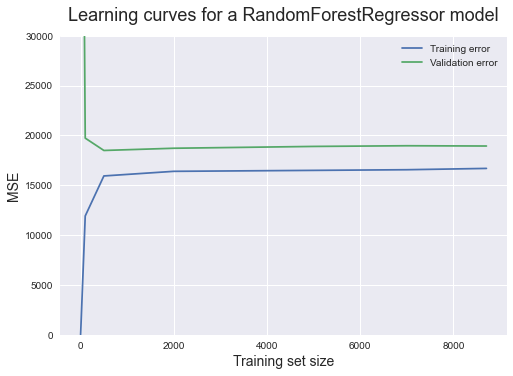

In [101]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a RandomForestRegressor model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,30000)

In [102]:
print('time : ',end_time - start_time)
print('RMSE : ',RMSE)

time :  17.476044178009033
RMSE :  132.16974905830654


In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
%time score = cross_val_score(rf, x_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

Wall time: 24.1 s


In [104]:
print(score)

1.158350800537146


## xgboost

In [105]:
import xgboost

In [119]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000, 7000,8708]
features = ['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'year_2011', 'year_2012']
target = 'count'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = xgboost.XGBRegressor(n_estimators=iTrees,
                               learning_rate=0.08,
                               gamma=0,
                               subsample=0.75,
                               colsample_bytree=1,
                               max_depth=7),
            shuffle=True,
            X = x[features],
            y = x[target],
            train_sizes = train_sizes,
            cv = 5,
            scoring = 'neg_mean_squared_error') #평균제곱오차(MSE)의 반대인 음숫값을 계산
                                                #사이킷런의 교차검증은 scoring 매개변수에 (낮을수록 좋은) 비용함수가 아닌
                                                #(클 수록 좋은) 효용 함수를 기대하기 때문


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-3.35276127e-08 -1.34110451e-07 -1.34110451e-07 -1.34110451e-07
  -7.04312697e-09]
 [-3.38294955e-07 -3.32834973e-07 -2.96437634e-07 -3.04162217e-07
  -3.35419883e-07]
 [-5.22594000e-07 -4.84548990e-07 -4.97678022e-07 -4.87883561e-07
  -4.75534444e-07]
 [-2.73999867e-02 -2.83434500e-02 -2.50799330e-02 -3.27867021e-02
  -2.17853344e-02]
 [-5.86472791e+00 -4.97161152e+00 -4.72691849e+00 -4.32816112e+00
  -3.63763747e+00]
 [-1.80123187e+01 -1.64439891e+01 -1.59747187e+01 -1.38458494e+01
  -1.30189787e+01]
 [-3.40800950e+01 -2.94544028e+01 -3.16011247e+01 -2.50203621e+01
  -2.35018987e+01]]

 ----------------------------------------------------------------------

Validation scores:

 [[-26926.43093301 -67050.70765659 -92006.94721967 -63140.75838659
  -67517.7335348 ]
 [ -8468.01297963  -7403.94482819 -11611.44439624 -19293.64212148
  -34420.37426181]
 [ -3188.75354824  -3327.40654777  -4669.53640243 -12127.77101354
  -10843.8983023 ]
 [ -1869.34946686  -2126.91102537  

In [107]:
# start_time = time.time()
# nTreeList = [0, 1, 5, 10, 15, 20, 30, 35, 40, 45, 50]
# for iTrees in nTreeList:
#     maxFeat = 4 #조정해볼 것
#     xgb = xgboost.XGBRegressor(n_estimators=iTrees,
#                                learning_rate=0.08,
#                                gamma=0,
#                                subsample=0.75,
#                                colsample_bytree=1,
#                                max_depth=7)
#     xgb.fit(x_train, y_train)
#     #데이터 세트에 대한 MSE 누적
#     y_xgb = xgb.predict(x_test)

#     RMSE = mean_squared_error(y_test, y_xgb)**0.5
#     print('n_estimators : ',iTrees, 'RMSE : ',RMSE)

# end_time = time.time()

In [108]:
# from sklearn.model_selection import GridSearchCV
# start_time = time.time()
# gcv = GridSearchCV(xgb,       # estimator
#             param_grid={'n_estimators':[10,20,30,40,50],
#                         'learning_rate':[0.08],
#                         'gamma':[0],
#                         'subsample':[0.75],
#                         'colsample_bytree':[1,2,3],
#                         'max_depth':[1,2,3,4],
#                         } , # 찾고자하는 파라미터. dict형식
#             cv=k_fold,
#             scoring=rmsle_scorer,  
#             n_jobs= 4,     # 병렬 처리갯수? -1은 전부)
#             refit=True     # default가 True. 
#                            # 좋은 estimator로 수정되어짐.
#             )   
# gcv
# gcv.fit(x_train,y_train)   # train_X, train_Y 
# gcv.best_params_           # 좋은 파라미터를 보여줌.
# end_time = time.time()
# gcv.best_score_

# print(gcv.best_params_ )
# print(gcv.best_score_)
# print('time : ',end_time - start_time)

In [120]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       8.858042e-08
100     3.214299e-07
500     4.936478e-07
2000    2.707908e-02
5000    4.705811e+00
7000    1.545917e+01
8708    2.873158e+01
dtype: float64

 --------------------

Mean validation scores

 1       63328.515546
100     16239.483717
500      6831.473163
2000     3249.630715
5000     3056.529065
7000     2783.427002
8708     2621.709968
dtype: float64


(0.0, 10000.0)

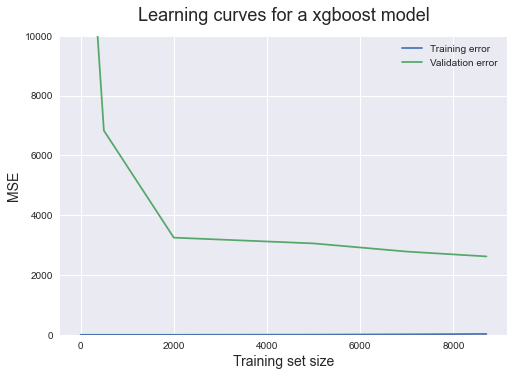

In [123]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a xgboost model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,10000)

## LinearRegression

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
train_sizes = [1, 100, 500, 2000, 5000, 7000,8708]
features = ['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'year_2011', 'year_2012']
target = 'count'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(), shuffle=True,
            X = x[features],
            y = x[target],
            train_sizes = train_sizes,
            cv = 5,
            scoring = 'neg_mean_squared_error') #평균제곱오차(MSE)의 반대인 음숫값을 계산
                                                #사이킷런의 교차검증은 scoring 매개변수에 (낮을수록 좋은) 비용함수가 아닌
                                                #(클 수록 좋은) 효용 함수를 기대하기 때문


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[    -0.             -0.             -0.             -0.
      -0.        ]
 [-19410.65533046 -15027.28078236 -16124.44017609 -14400.50402694
  -11688.62721052]
 [-21913.47056403 -19239.11044345 -20024.22700836 -16815.93500019
  -17316.31100915]
 [-20425.33124626 -20111.69331278 -20740.708702   -17649.68568017
  -17075.88873461]
 [-20880.05573983 -21560.48364902 -21825.80760618 -17715.21387675
  -16654.10405899]
 [-21048.41249942 -21933.96381651 -21873.49517513 -17981.22958236
  -16528.20834185]
 [-21189.86362369 -21630.70189362 -21633.29235653 -17928.15136341
  -16418.50307829]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -35415.44536272  -58760.09967846  -43100.55489205  -62927.00183739
  -118122.01286174]
 [ -17976.43583859  -15246.02592983  -15248.66567035  -27910.49330204
   -36301.63128688]
 [ -14689.16240264  -13639.20428023  -13467.43047676  -27782.77553352
   -36371.36932471]
 [ -14683.45282855  -13703.0

In [112]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1          -0.000000
100     15330.301505
500     19061.810805
2000    19200.661535
5000    19727.132986
7000    19873.061883
8708    19760.102463
dtype: float64

 --------------------

Mean validation scores

 1       63665.022926
100     22536.650406
500     21189.988404
2000    20838.957928
5000    20462.931162
7000    20521.200289
8708    20500.787174
dtype: float64


(15000.0, 25000.0)

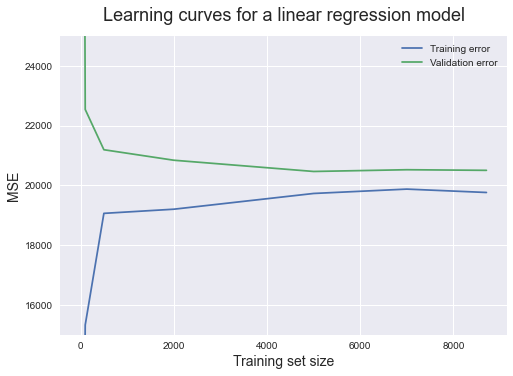

In [113]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(15000,25000)

## lightgbm

In [114]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [115]:
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}
gbm = lgb.LGBMRegressor(**params)
gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test), (x_train, y_train)],
        verbose=100,
        eval_metric='l1',
        early_stopping_rounds=1000)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Training until validation scores don't improve for 1000 rounds
[100]	training's l1: 67.7706	training's l2: 7653.47	valid_0's l1: 70.0042	valid_0's l2: 8403.04
Did not meet early stopping. Best iteration is:
[100]	training's l1: 67.7706	training's l2: 7653.47	valid_0's l1: 70.0042	valid_0's l2: 8403.04


LGBMRegressor(bagging_fraction=0.7, bagging_freq=5, boosting='gbdt',
              feature_fraction=0.9, is_training_metric=True, learning_rate=0.01,
              max_depth=16, metric='mse', num_leaves=144,
              objective='regression', seed=2018)

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
predict_train = gbm.predict(x_train)
predict_test = gbm.predict(x_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)
print('mse : ',mse)
print('r2 : ',r2)

mse :  8403.036580142061
r2 :  0.7478274329910584


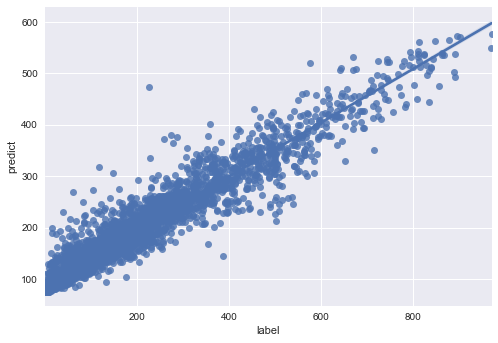

In [117]:
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['label','predict']
sns.regplot(x = 'label', y = 'predict', data = final_result)

<ipython-input-118-232a87a9f0a8>:2: UserWarning: More than one metric available, picking one to plot.
  lgb.plot_metric(gbm)


(0.0, 200000.0)

<Figure size 1008x576 with 0 Axes>

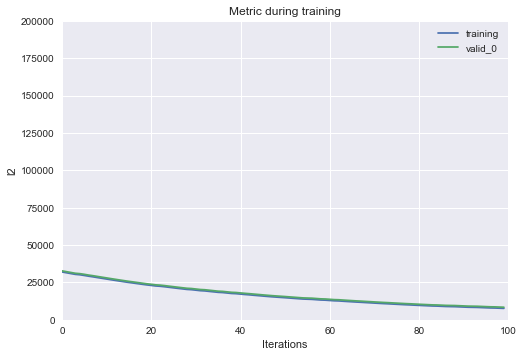

In [118]:
plt.figure(figsize=(14, 8))
lgb.plot_metric(gbm)
plt.xlim(0,100)
plt.ylim(0,200000)